In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as  plt
import sklearn
import os
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("Exam2019.csv")
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [3]:
df.isnull().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

In [4]:
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
dtypeCount

[<class 'int'>    1000
 Name: Default, dtype: int64, <class 'str'>    1000
 Name: checkingstatus1, dtype: int64, <class 'int'>    1000
 Name: duration, dtype: int64, <class 'str'>    1000
 Name: history, dtype: int64, <class 'str'>    1000
 Name: purpose, dtype: int64, <class 'int'>    1000
 Name: amount, dtype: int64, <class 'str'>    1000
 Name: savings, dtype: int64, <class 'str'>    1000
 Name: employ, dtype: int64, <class 'int'>    1000
 Name: installment, dtype: int64, <class 'str'>    1000
 Name: status, dtype: int64, <class 'str'>    1000
 Name: others, dtype: int64, <class 'int'>    1000
 Name: residence, dtype: int64, <class 'str'>    1000
 Name: property, dtype: int64, <class 'int'>    1000
 Name: age, dtype: int64, <class 'str'>    1000
 Name: otherplans, dtype: int64, <class 'str'>    1000
 Name: housing, dtype: int64, <class 'int'>    1000
 Name: cards, dtype: int64, <class 'str'>    1000
 Name: job, dtype: int64, <class 'int'>    1000
 Name: liable, dtype: int64, <class 

In [5]:
df['Default'].value_counts()

0    700
1    300
Name: Default, dtype: int64

In [6]:
df['amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64

In [7]:
df['monthlyamount'] = df['amount']/df['duration']
df['monthlyamount'].describe()

count    1000.000000
mean      167.687020
std       153.490959
min        24.055556
25%        89.600000
50%       130.333333
75%       206.183333
max      2482.666667
Name: monthlyamount, dtype: float64

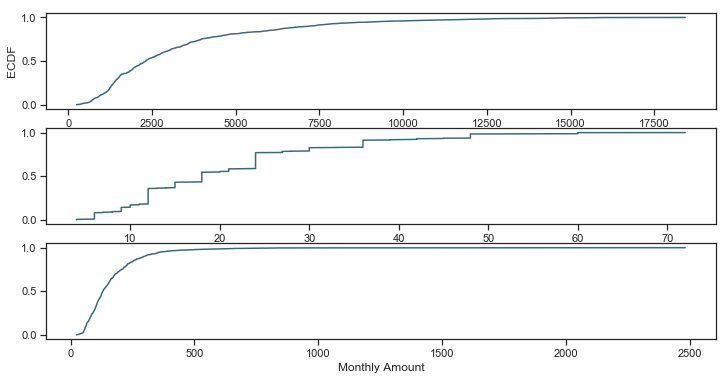

In [8]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
#ECDF: empirical cumulative distribution function
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(df['amount'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Amount'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(df['duration'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Duration');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(df['monthlyamount'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Monthly Amount');

In [9]:
df.groupby('duration')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
duration,,,,,,,,
4,6.0,1662.833333,915.152319,601.0,1464.75,1498.5,1533.75,3380.0
5,1.0,3448.000000,NaN,3448.0,3448.00,3448.0,3448.00,3448.0
6,75.0,1787.733333,2422.428463,250.0,691.50,1237.0,1746.50,14896.0
7,5.0,1779.200000,910.095435,730.0,846.00,2329.0,2415.00,2576.0
8,7.0,1373.000000,928.221597,731.0,833.50,1164.0,1325.50,3398.0
9,49.0,1714.714286,931.806154,276.0,1154.00,1391.0,2134.00,5129.0
10,28.0,1888.964286,1285.531638,727.0,1237.75,1469.5,2162.00,7308.0
11,9.0,3047.888889,2069.404289,1154.0,1393.00,2142.0,3939.00,7228.0
12,179.0,1787.446927,1266.271498,339.0,954.50,1412.0,2160.00,7865.0


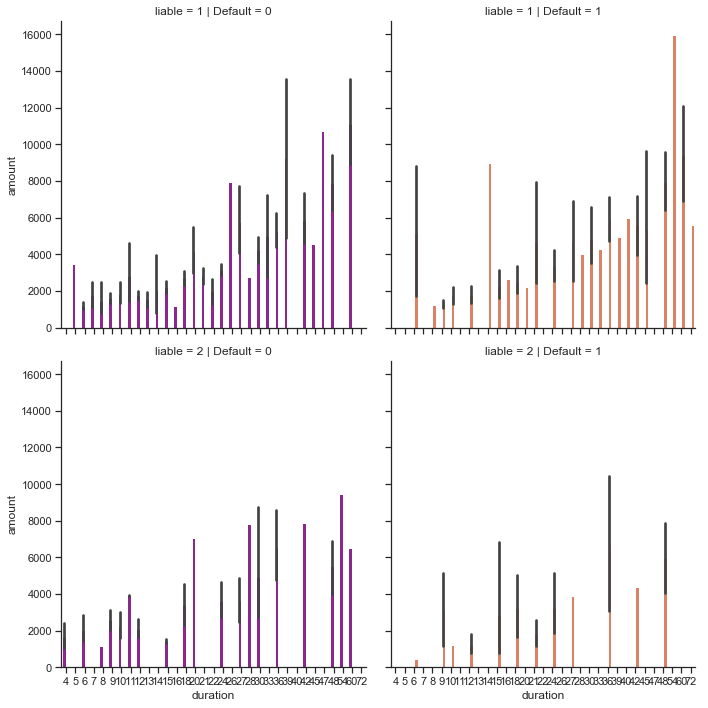

In [10]:
# sales trends
sns.catplot(data = df, x = 'duration', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c) 

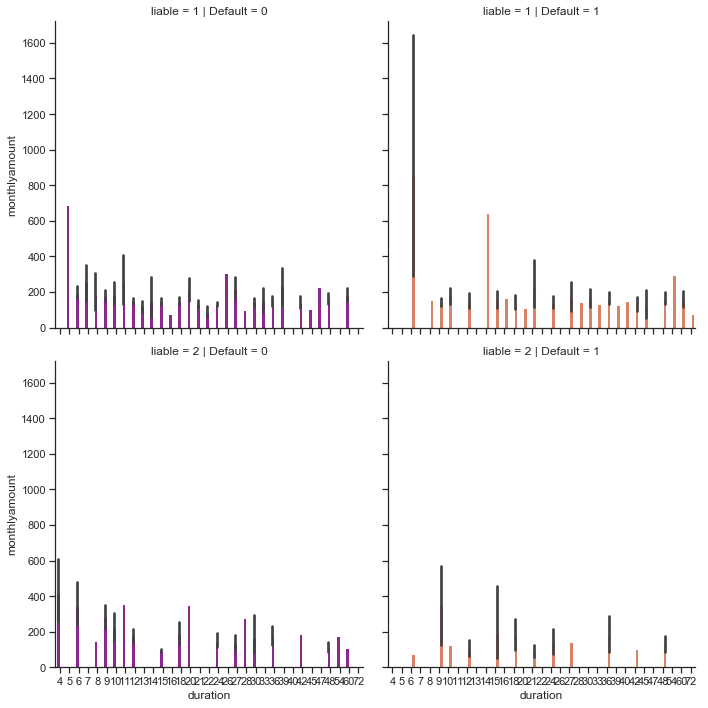

In [11]:
sns.catplot(data = df, x = 'duration', y = "monthlyamount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c) 

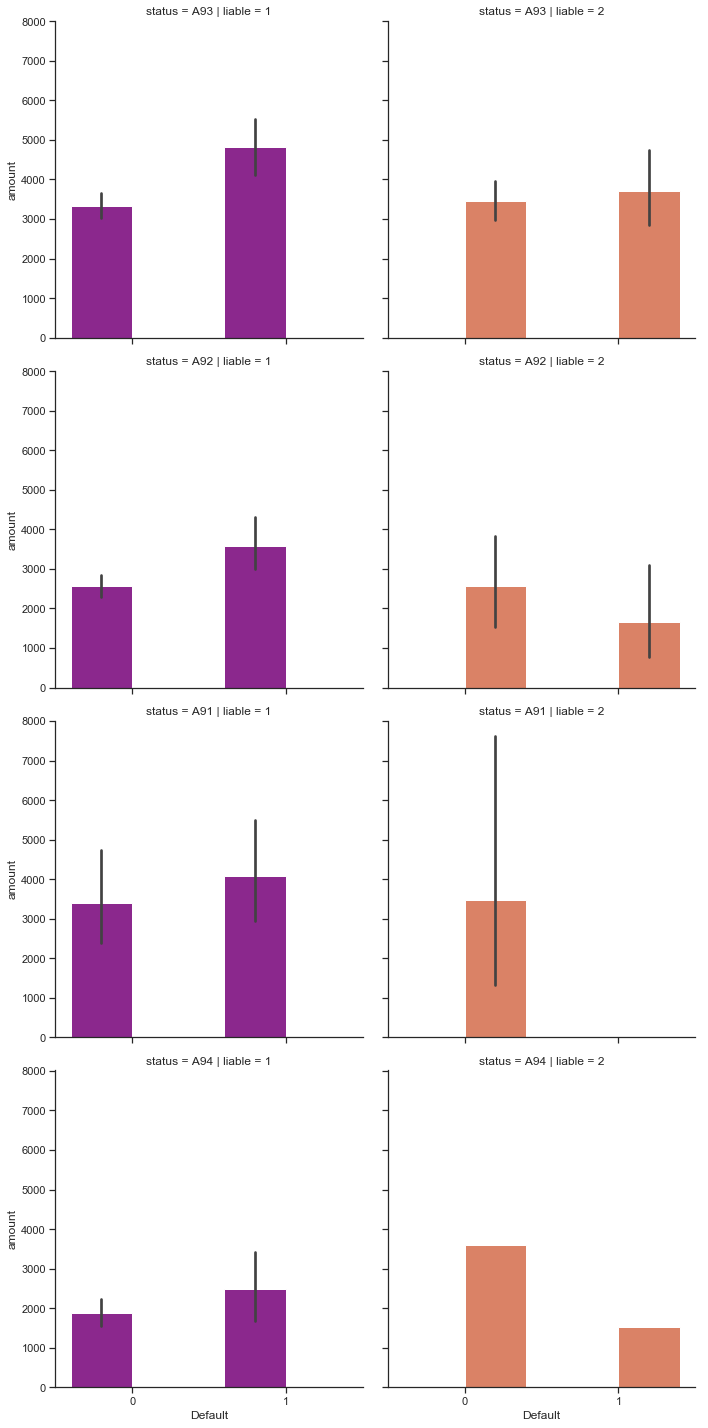

In [12]:
sns.catplot(data = df, x = 'Default', y = "amount", 
               col = 'liable',
               palette = 'plasma',
               hue = 'liable',
               row = 'status',
            kind="bar",
               color = c) 

In [13]:
df.groupby('Default')['monthlyamount'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,700.0,165.819730,110.574834,25.250000,96.906250,134.916667,211.975000,1126.833333
1,300.0,172.044031,223.840381,24.055556,76.197917,121.058333,196.361111,2482.666667


In [14]:
df.groupby('liable')['monthlyamount'].describe()

,count,mean,std,min,25%,50%,75%,max
liable,,,,,,,,
1,845.0,161.998234,152.731826,24.055556,87.380952,128.222222,196.037037,2482.666667
2,155.0,198.700085,154.404834,39.458333,94.675926,152.583333,266.645833,1126.833333


In [15]:
interval = (18, 25, 35, 60, 120)

cats = ['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer']
df["age"] = pd.cut(df.age, interval, labels=cats)

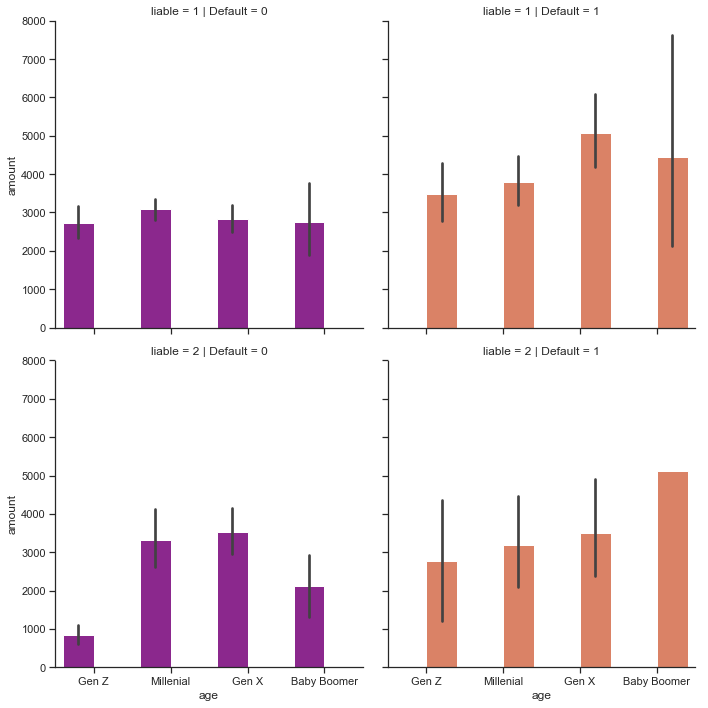

In [16]:
sns.catplot(data = df, x = 'age', y = "amount", 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
               row = 'liable',
            kind="bar",
               color = c) 

In [17]:
df.corr()

,Default,duration,amount,installment,residence,cards,liable,monthlyamount
Default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.045732,-0.003015,0.018592
duration,0.214927,1.000000,0.624984,0.074749,0.034067,-0.011284,-0.023834,-0.126498
amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.020795,0.017142,0.521938
installment,0.072404,0.074749,-0.271316,1.000000,0.049302,0.021669,-0.071207,-0.396191
residence,0.002967,0.034067,0.028926,0.049302,1.000000,0.089625,0.042643,0.009277
cards,-0.045732,-0.011284,0.020795,0.021669,0.089625,1.000000,0.109667,-0.003556
liable,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.109667,1.000000,0.086580
monthlyamount,0.018592,-0.126498,0.521938,-0.396191,0.009277,-0.003556,0.086580,1.000000


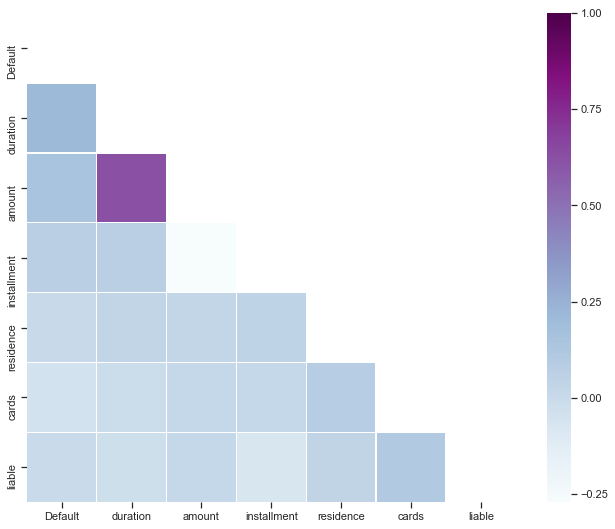

In [18]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = df.drop('monthlyamount', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Text(0.5, 1.0, 'Credit amount distribution for bad transactions')

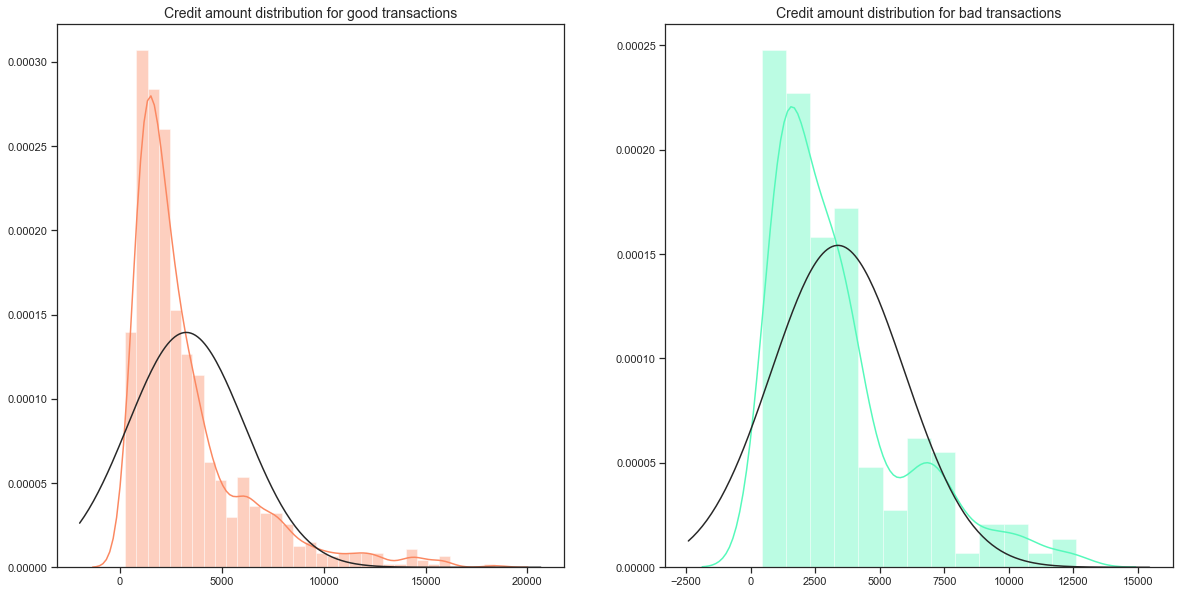

In [19]:
from scipy.stats import norm

f, (ax1,ax2) =plt.subplots(1,2, figsize=(20, 10))

credit_amount_dist = df['amount'].loc[df['liable'] == 1].values
sns.distplot(credit_amount_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Credit amount distribution for good transactions', fontsize=14)

credit_amount_dist = df['amount'].loc[df['liable'] == 2].values
sns.distplot(credit_amount_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Credit amount distribution for bad transactions', fontsize=14)


 mu = 3271.26 and sigma = 2821.33



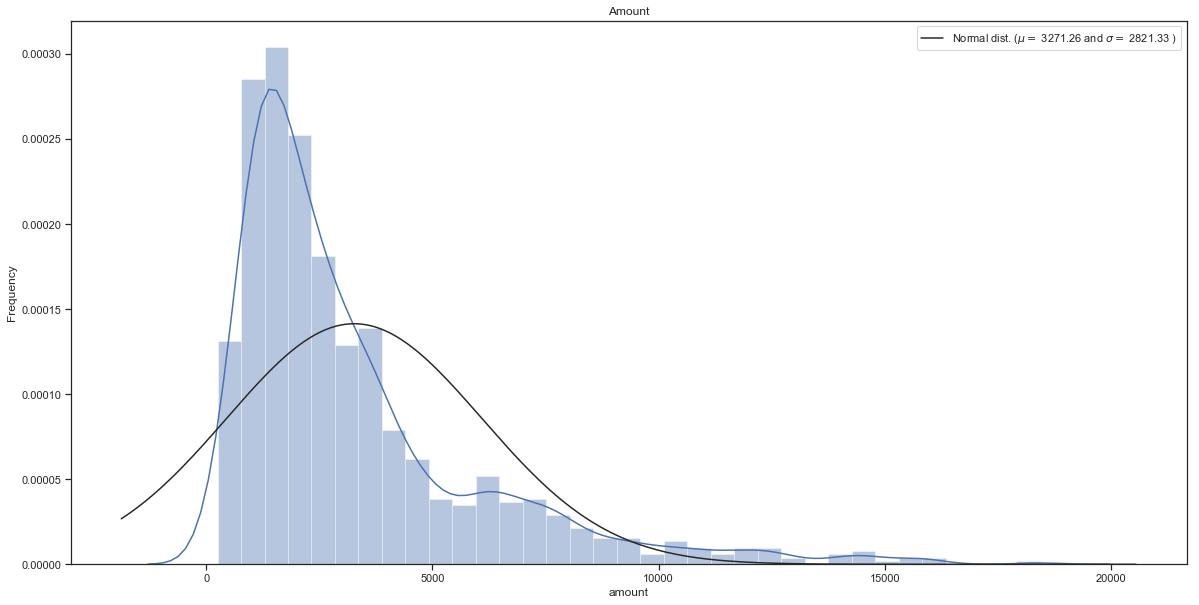

<Figure size 432x288 with 0 Axes>

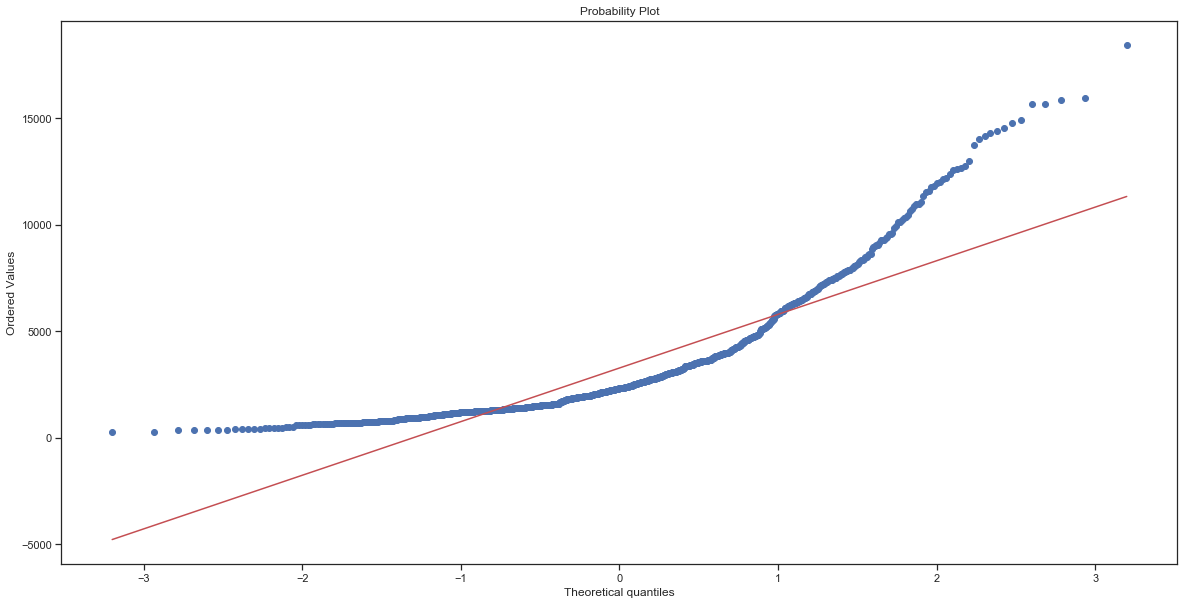

In [20]:
from scipy import stats
from scipy.stats import norm, skew
plt.figure(figsize=(20,10))
sns.distplot(df['amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

#Get also the QQ-plot
fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['amount'], plot=plt)
plt.show()

In [21]:
df = df.dropna(how='any')

In [22]:
from statsmodels.formula.api import ols
model = ols("Default ~ age + checkingstatus1 + duration + history + purpose + amount +savings +employ+installment+status+residence+property+age+otherplans+housing+cards+job+liable+tele+foreign+monthlyamount", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     7.520
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           3.12e-41
Time:                        12:22:34   Log-Likelihood:                -474.73
No. Observations:                1000   AIC:                             1049.
Df Residuals:                     950   BIC:                             1295.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5409      0.172      3.136      0.002       0.202       0.879
age[T.Millenial]          -0.0695      0.039     -1.793      0.073      -0.146       0.007
age[T.Gen X]              -0.0972      0.043     -2.265      0.024      -0.181      -0.013
age[T.Baby Boomer]        -0.1203      0.073     -1.644      0.100      -0.264       0.023
checkingstatus1[T.A12]    -0.0845      0.037     -2.301      0.022      -0.157      -0.012
checkingstatus1[T.A13]    -0.1720      0.058     -2.969      0.003      -0.286      -0.058
checkingstatus1[T.A14]    -0.2595      0.035     -7.487      0.000      -0.327      -0.191
history[T.A31]            -0.0069      0.090     -0.076      0.939      -0.184       0.170
history[T.A32]            -0.1573      0.071     -2.211      0.027      -0.297      -0.018
history[T.A33]            -0.1874      0.078     -2.399      0.017      -0.341      -0.034
history[T.A34]            -0.2669      0.072     -3.703      0.000      -0.408      -0.125
purpose[T.A41]            -0.2320      0.051     -4.594      0.000      -0.331      -0.133
purpose[T.A410]           -0.2136      0.125     -1.706      0.088      -0.459       0.032
purpose[T.A42]            -0.1258      0.042     -3.024      0.003      -0.207      -0.044
purpose[T.A43]            -0.1449      0.037     -3.875      0.000      -0.218      -0.072
purpose[T.A44]            -0.0686      0.120     -0.570      0.569      -0.305       0.167
purpose[T.A45]            -0.0527      0.091     -0.578      0.563      -0.232       0.126
purpose[T.A46]             0.0266      0.064      0.416      0.678      -0.099       0.152
purpose[T.A48]            -0.2327      0.139     -1.670      0.095      -0.506       0.041
purpose[T.A49]            -0.1103      0.052     -2.130      0.033      -0.212      -0.009
savings[T.A62]            -0.0448      0.045     -1.006      0.315      -0.132       0.043
savings[T.A63]            -0.0707      0.055     -1.289      0.198      -0.178       0.037
savings[T.A64]            -0.1292      0.062     -2.098      0.036      -0.250      -0.008
savings[T.A65]            -0.1190      0.036     -3.334      0.001      -0.189      -0.049
employ[T.A72]             -0.0079      0.069     -0.113      0.910      -0.144       0.128
employ[T.A73]             -0.0400      0.066     -0.604      0.546      -0.170       0.090
employ[T.A74]             -0.1286      0.069     -1.856      0.064      -0.265       0.007
employ[T.A75]             -0.0539      0.066     -0.811      0.417      -0.184       0.076
status[T.A92]             -0.0679      0.063     -1.071      0.284      -0.192       0.056
status[T.A93]             -0.1389      0.062     -2.257      0.024      -0.260      -0.018
status[T.A94]             -0.0936      0.073     -1.277      0.202      -0.238  

In [23]:
df["amount"] = np.log1p(df["amount"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])

In [24]:
df = df.dropna(how='any')

In [25]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
credit=df['amount'].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["monthlyamount"] = SC.fit_transform(creditmonth)


 mu = 0.00 and sigma = 1.00



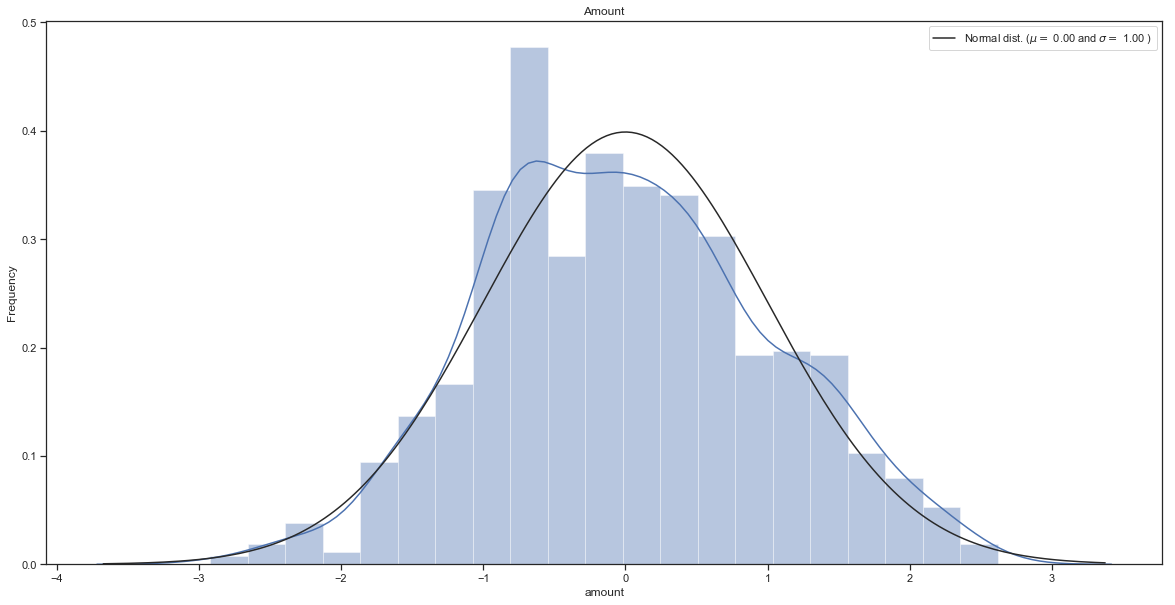

<Figure size 432x288 with 0 Axes>

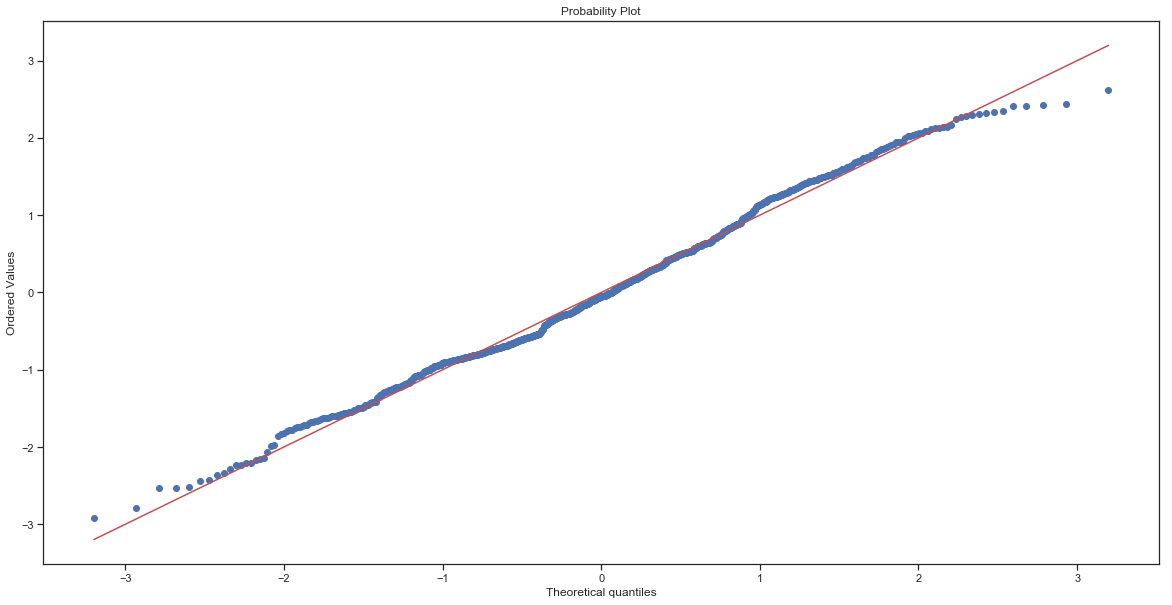

In [26]:
plt.figure(figsize=(20,10))
sns.distplot(df['amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

#Get also the QQ-plot
fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['amount'], plot=plt)
plt.show()


 mu = 0.00 and sigma = 1.00



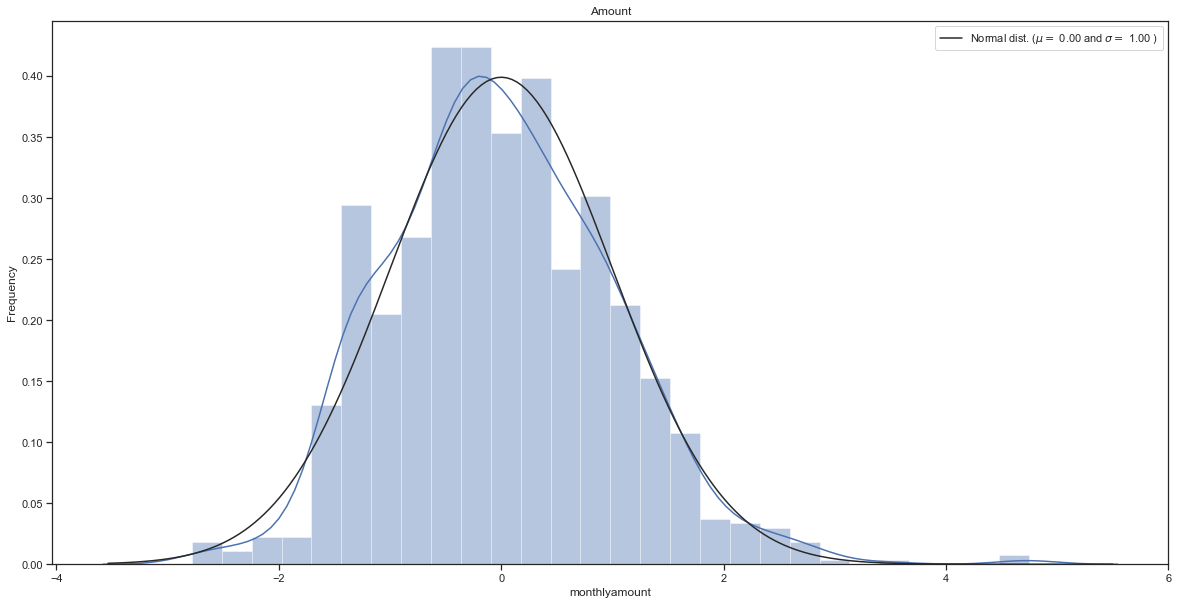

<Figure size 432x288 with 0 Axes>

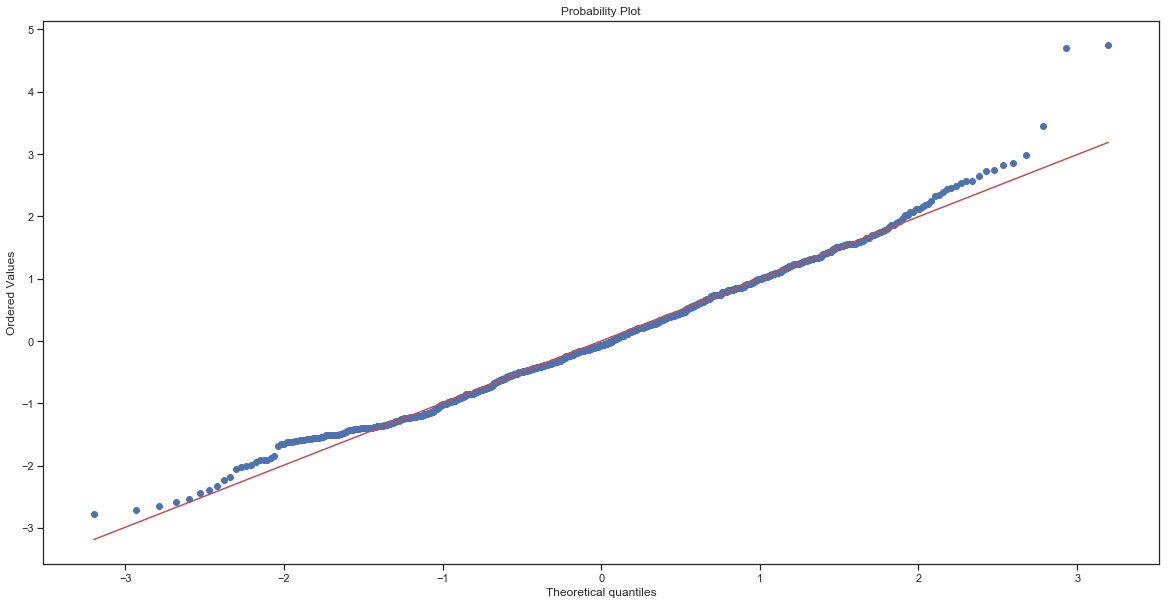

In [27]:
plt.figure(figsize=(20,10))
sns.distplot(df['monthlyamount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['monthlyamount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Amount')

#Get also the QQ-plot
fig = plt.figure()
plt.figure(figsize=(20,10))
res = stats.probplot(df['monthlyamount'], plot=plt)
plt.show()

In [28]:
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)

In [29]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["duration"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]

In [30]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(8888)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [31]:
X_train.head()

,amount,monthlyamount,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,...,installment_2,installment_3,installment_4,residence_2,residence_3,residence_4,cards_2,cards_3,cards_4,liable_2
298,0.053091,0.043188,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
160,0.224148,-0.208594,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
268,1.693211,2.529390,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
658,0.720421,0.054527,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
996,0.604188,-0.092061,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [32]:
import prince
mca = prince.MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=88)
mca = mca.fit(X)

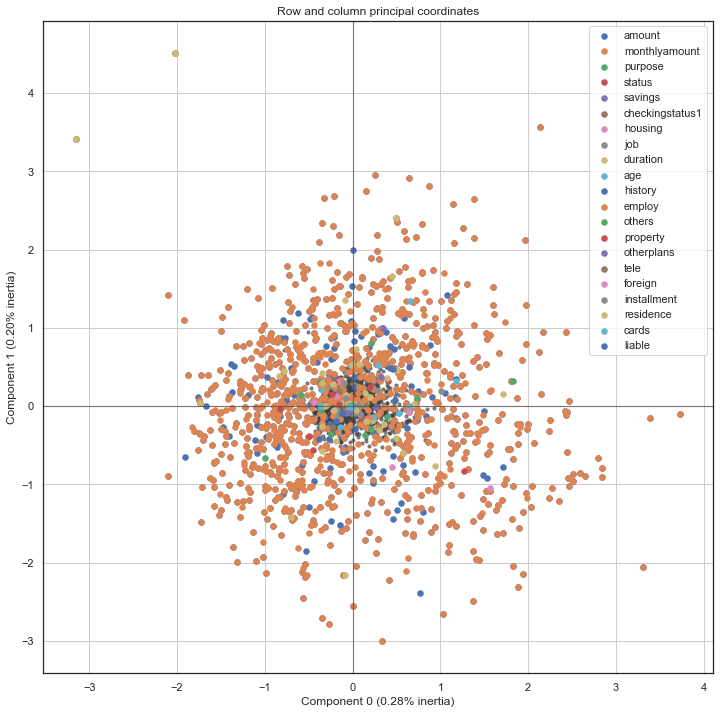

In [33]:
ax = mca.plot_coordinates(X=X,ax=None,figsize=(12, 12),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=30,show_column_labels=False,legend_n_cols=1)

In [34]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=100, random_state= 0)
X_train_svd= svd.fit_transform(X_train)

In [35]:
explained_variance=svd.explained_variance_ratio_
explained_variance

array([0.01717488, 0.18051796, 0.06776954, 0.05237042, 0.0485109 ,
       0.03938779, 0.03769023, 0.03235207, 0.02980178, 0.02836612,
       0.02827695, 0.02657493, 0.02546887, 0.02160213, 0.02030136,
       0.0197826 , 0.01791037, 0.01671945, 0.01607681, 0.01546317,
       0.01456652, 0.01397108, 0.01349124, 0.0129044 , 0.01222513,
       0.01172172, 0.01144446, 0.0108333 , 0.01022165, 0.0100365 ,
       0.00906041, 0.0087048 , 0.00800577, 0.00743401, 0.00697363,
       0.00631122, 0.00573097, 0.00545133, 0.00516553, 0.00486387,
       0.00475798, 0.00468283, 0.00419525, 0.00412628, 0.00391592,
       0.00386689, 0.00352594, 0.00306603, 0.00293744, 0.00277343])

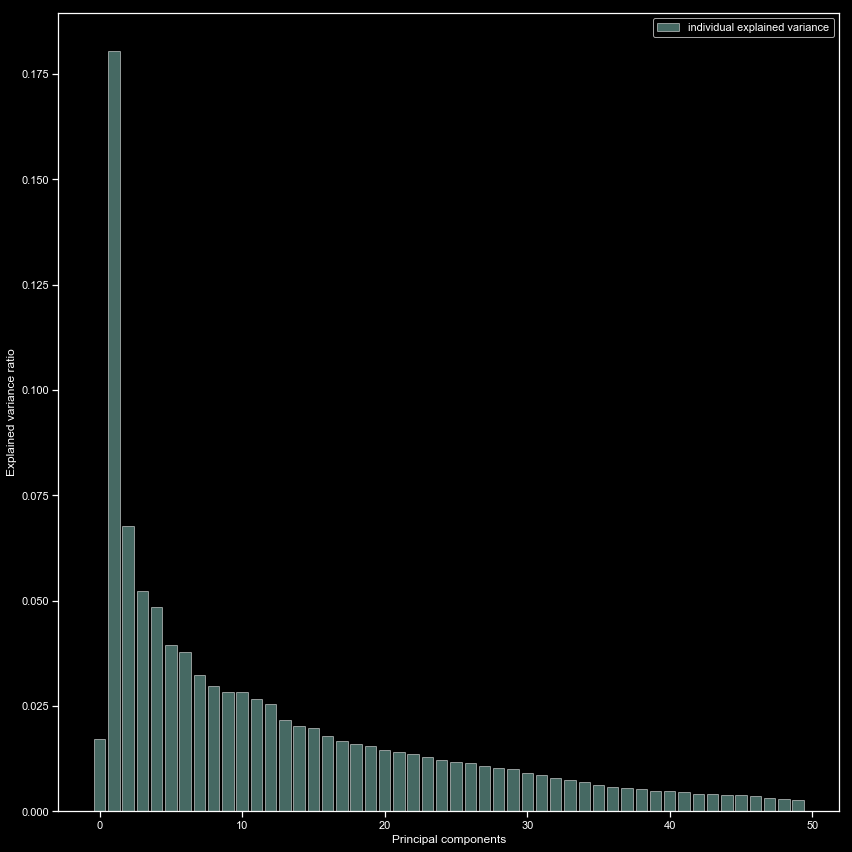

In [36]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 12))
    plt.bar(range(50), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [37]:
X_train_svd= pd.DataFrame(X_train_svd)
X_train_svd.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.786362,0.290904,0.228323,-0.562334,0.429949,0.566629,-0.041609,-1.055762,-0.631811,0.103104,...,-0.061475,-0.084080,-0.052200,-0.062470,-0.054889,0.061768,-0.058830,0.071654,0.126247,-0.112464
1,2.852870,0.218330,1.442059,0.299910,0.117793,0.094436,0.248306,-0.558479,-0.126892,0.598397,...,-0.049914,-0.053257,-0.173214,0.068484,-0.082857,-0.040022,0.044749,0.131386,0.063621,-0.052645
2,1.948864,3.024431,0.340376,-0.867677,0.939182,0.835741,0.301553,0.450977,0.349792,0.744156,...,0.077740,0.039836,0.070512,-0.065434,-0.081991,-0.037971,0.154692,0.205613,-0.175169,0.210563
3,2.050932,0.513331,-1.254886,0.309431,-0.312907,-1.120746,0.545260,0.462231,0.062201,-0.717572,...,0.114599,0.055237,0.542940,-0.352184,0.371187,-0.338243,-0.615902,0.102694,0.282532,-0.227686
4,2.302327,0.494358,0.509709,-1.057752,-0.154661,0.776851,0.250849,0.046698,0.211154,-0.154879,...,0.168453,-0.029939,0.395596,-0.134602,0.225730,-0.514042,-0.469255,-0.024868,0.020089,-0.186124


In [38]:
X_test_svd= svd.transform(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #To evaluate our model
from sklearn.model_selection import GridSearchCV
# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [40]:
classifier = LogisticRegression()
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator= classifier,param_grid= parameters, cv=5,  n_jobs= -1)

In [41]:
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
cm= confusion_matrix(y_test, y_pred)
labels = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

         Bad       0.77      0.97      0.86       176
        Good       0.80      0.32      0.46        74

   micro avg       0.78      0.78      0.78       250
   macro avg       0.79      0.65      0.66       250
weighted avg       0.78      0.78      0.74       250



In [43]:
import sklearn
from sklearn import*
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes', 'XGBoost']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 50), GaussianNB(), XGBClassifier(max_depth= 50, n_estimators=100)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Logistic Regression,0.764
Random forest,0.764
Linear Svm,0.748
KNN,0.740
XGBoost,0.724
Radial Svm,0.704
Decision Tree,0.644
Naive Bayes,0.348


In [44]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(X_train,y_train)
predictionRF=modelRF.predict(X_test)
pd.Series(modelRF.feature_importances_,index=X_train.columns).sort_values(ascending=False)

amount                 0.106546
monthlyamount          0.097447
checkingstatus1_A14    0.062400
history_A34            0.027195
otherplans_A143        0.019873
housing_A152           0.018721
age_Millenial          0.018250
installment_4          0.018186
property_A123          0.016781
checkingstatus1_A12    0.016642
purpose_A43            0.016557
status_A92             0.016391
employ_A72             0.016351
age_Gen X              0.016172
savings_A65            0.016041
job_A173               0.015846
residence_2            0.015439
duration_48            0.015260
foreign_A192           0.014834
employ_A73             0.014358
history_A32            0.014322
employ_A75             0.014187
duration_18            0.014134
cards_2                0.014052
liable_2               0.013584
residence_4            0.013271
installment_2          0.013206
history_A31            0.013162
status_A93             0.012866
tele_A192              0.012722
                         ...   
duration

In [45]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
import xgboost as xgb

In [46]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=50)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

#XGBoost
modelXGB = xgb.XGBClassifier(max_depth= 50, n_estimators=100)
modelXGB.fit(X_train, y_train)
y_pred_prob_xgb = modelXGB.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_prob_xgb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


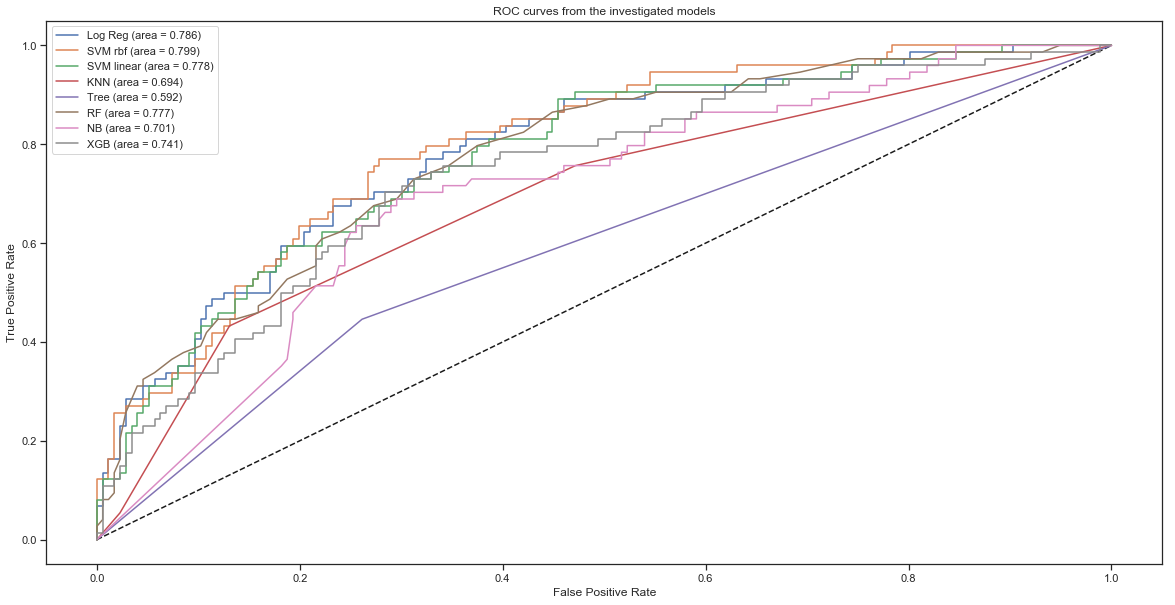

In [47]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

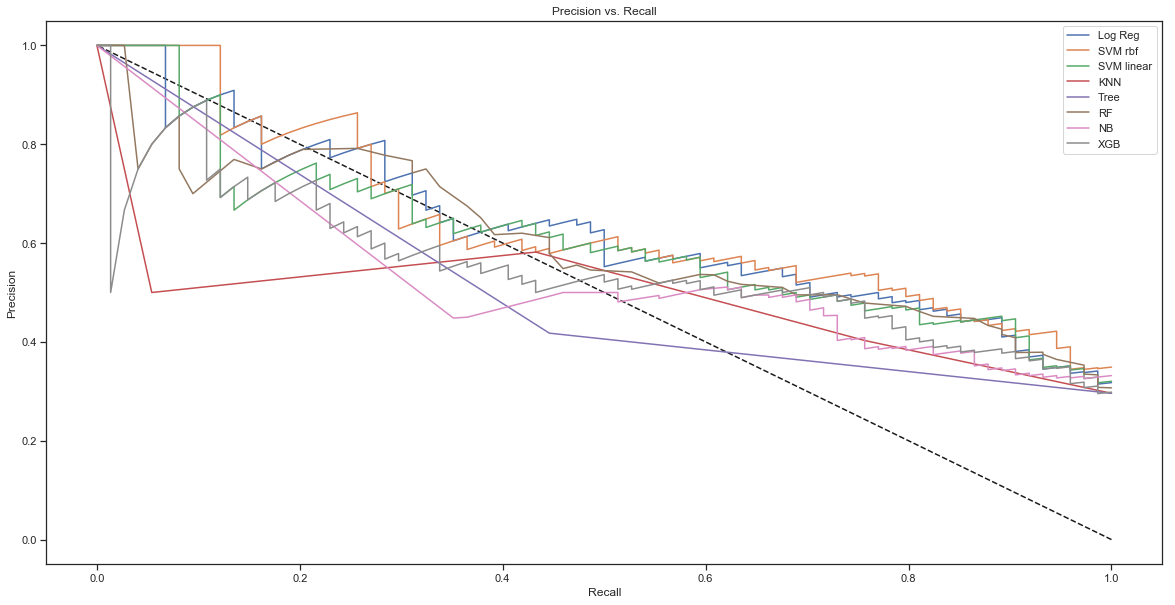

In [48]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_xgb, precision_xgb, label='XGB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(8)

Using TensorFlow backend.


In [50]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [51]:
model = Sequential()
model.add(Dense(8, input_dim=88, activation='relu'))
model.add(Dense(12, input_dim=88, activation='relu'))
model.add(Dense(12, input_dim=88, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
epoch = 200
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 750 samples, validate on 250 samples
Epoch 1/200
 - 0s - loss: 0.6949 - acc: 0.4847 - val_loss: 0.6935 - val_acc: 0.5260
Epoch 2/200
 - 0s - loss: 0.6917 - acc: 0.5267 - val_loss: 0.6909 - val_acc: 0.5420
Epoch 3/200
 - 0s - loss: 0.6898 - acc: 0.5567 - val_loss: 0.6891 - val_acc: 0.5520
Epoch 4/200
 - 0s - loss: 0.6883 - acc: 0.5673 - val_loss: 0.6875 - val_acc: 0.5680
Epoch 5/200
 - 0s - loss: 0.6868 - acc: 0.5747 - val_loss: 0.6861 - val_acc: 0.5640
Epoch 6/200
 - 0s - loss: 0.6854 - acc: 0.5733 - val_loss: 0.6846 - val_acc: 0.5640
Epoch 7/200
 - 0s - loss: 0.6840 - acc: 0.5687 - val_loss: 0.6831 - val_acc: 0.5600
Epoch 8/200
 - 0s - loss: 0.6824 - acc: 0.5607 - val_loss: 0.6816 - val_acc: 0.5500
Epoch 9/200
 - 0s - loss: 0.6809 - acc: 0.5533 - val_loss: 0.6800 - val_acc: 0.5400
Epoch 10/200
 - 0s - loss: 0.6792 - acc: 0.5427 - val_loss: 0.6784 - val_acc: 0.5420
Epoch 11/200
 - 0s - loss: 0.6775 - acc: 0.5400 - val_loss: 0.676

Epoch 94/200
 - 0s - loss: 0.2062 - acc: 0.9300 - val_loss: 0.8947 - val_acc: 0.7400
Epoch 95/200
 - 0s - loss: 0.2031 - acc: 0.9313 - val_loss: 0.9071 - val_acc: 0.7300
Epoch 96/200
 - 0s - loss: 0.1977 - acc: 0.9347 - val_loss: 0.9248 - val_acc: 0.7220
Epoch 97/200
 - 0s - loss: 0.1932 - acc: 0.9373 - val_loss: 0.9270 - val_acc: 0.7280
Epoch 98/200
 - 0s - loss: 0.1887 - acc: 0.9380 - val_loss: 0.9637 - val_acc: 0.7280
Epoch 99/200
 - 0s - loss: 0.1852 - acc: 0.9413 - val_loss: 0.9637 - val_acc: 0.7220
Epoch 100/200
 - 0s - loss: 0.1827 - acc: 0.9433 - val_loss: 0.9847 - val_acc: 0.7240
Epoch 101/200
 - 0s - loss: 0.1803 - acc: 0.9433 - val_loss: 1.0077 - val_acc: 0.7260
Epoch 102/200
 - 0s - loss: 0.1766 - acc: 0.9440 - val_loss: 1.0207 - val_acc: 0.7260
Epoch 103/200
 - 0s - loss: 0.1725 - acc: 0.9453 - val_loss: 1.0296 - val_acc: 0.7140
Epoch 104/200
 - 0s - loss: 0.1686 - acc: 0.9467 - val_loss: 1.0335 - val_acc: 0.7280
Epoch 105/200
 - 0s - loss: 0.1665 - acc: 0.9480 - val_loss:

Epoch 190/200
 - 0s - loss: 0.0319 - acc: 0.9960 - val_loss: 2.3422 - val_acc: 0.6880
Epoch 191/200
 - 0s - loss: 0.0307 - acc: 0.9960 - val_loss: 2.3621 - val_acc: 0.6880
Epoch 192/200
 - 0s - loss: 0.0297 - acc: 0.9960 - val_loss: 2.3628 - val_acc: 0.6880
Epoch 193/200
 - 0s - loss: 0.0287 - acc: 0.9960 - val_loss: 2.3682 - val_acc: 0.6880
Epoch 194/200
 - 0s - loss: 0.0283 - acc: 0.9960 - val_loss: 2.3687 - val_acc: 0.6920
Epoch 195/200
 - 0s - loss: 0.0274 - acc: 0.9960 - val_loss: 2.3764 - val_acc: 0.6920
Epoch 196/200
 - 0s - loss: 0.0263 - acc: 0.9960 - val_loss: 2.3904 - val_acc: 0.6920
Epoch 197/200
 - 0s - loss: 0.0260 - acc: 0.9960 - val_loss: 2.4023 - val_acc: 0.6940
Epoch 198/200
 - 0s - loss: 0.0260 - acc: 0.9967 - val_loss: 2.4064 - val_acc: 0.6960
Epoch 199/200
 - 0s - loss: 0.0255 - acc: 0.9960 - val_loss: 2.4220 - val_acc: 0.6920
Epoch 200/200
 - 0s - loss: 0.0243 - acc: 0.9967 - val_loss: 2.4233 - val_acc: 0.7000


In [54]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

250/250 [==============================] - 0s 47us/step
Test score: 2.4232909088134766
Test accuracy: 0.6999999980926513


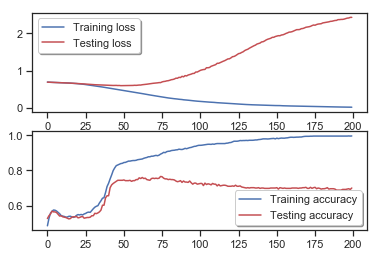

In [55]:
# Plot the loss and accuracy curves for training and validation vs. epochs


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

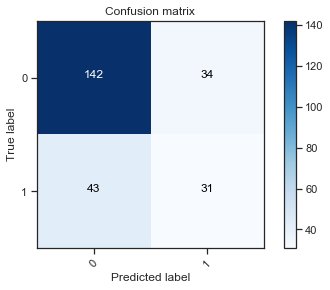

In [57]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

In [58]:
df = pd.read_csv("Exam2019.csv")

In [59]:
df['monthlyamount'] = df['amount']/df['duration']
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["monthlyamount"] = SC.fit_transform(creditmonth)

In [60]:
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)

In [61]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["duration"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]

In [62]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(8888)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [64]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 50), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Random forest,0.752
Logistic Regression,0.720
Radial Svm,0.708
Decision Tree,0.700
Linear Svm,0.692
KNN,0.652
Naive Bayes,0.384


In [65]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=50)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


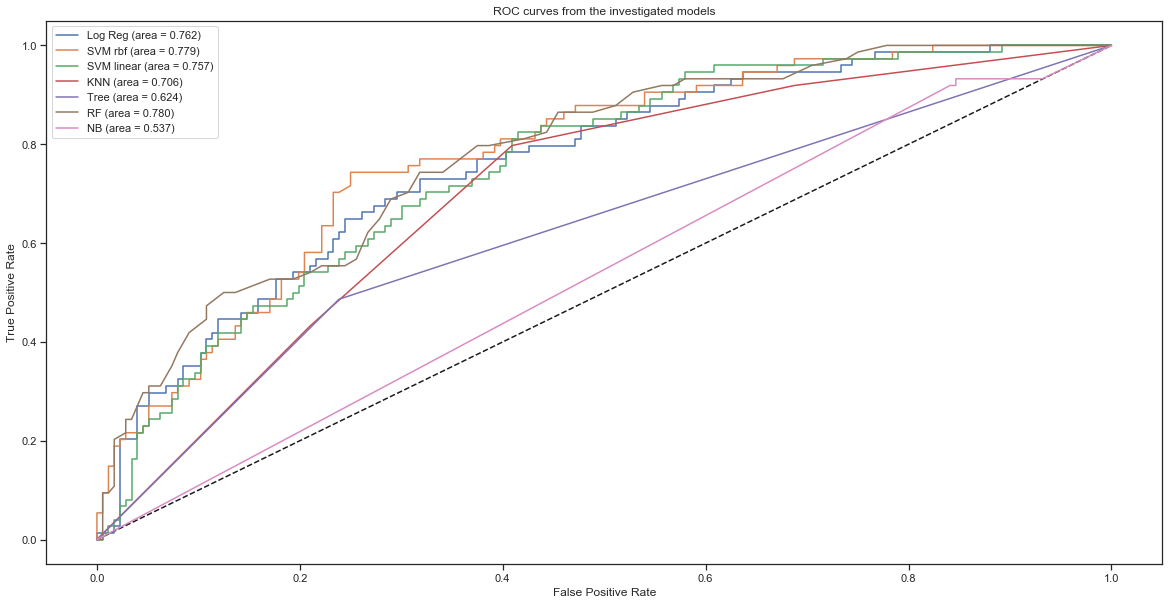

In [66]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

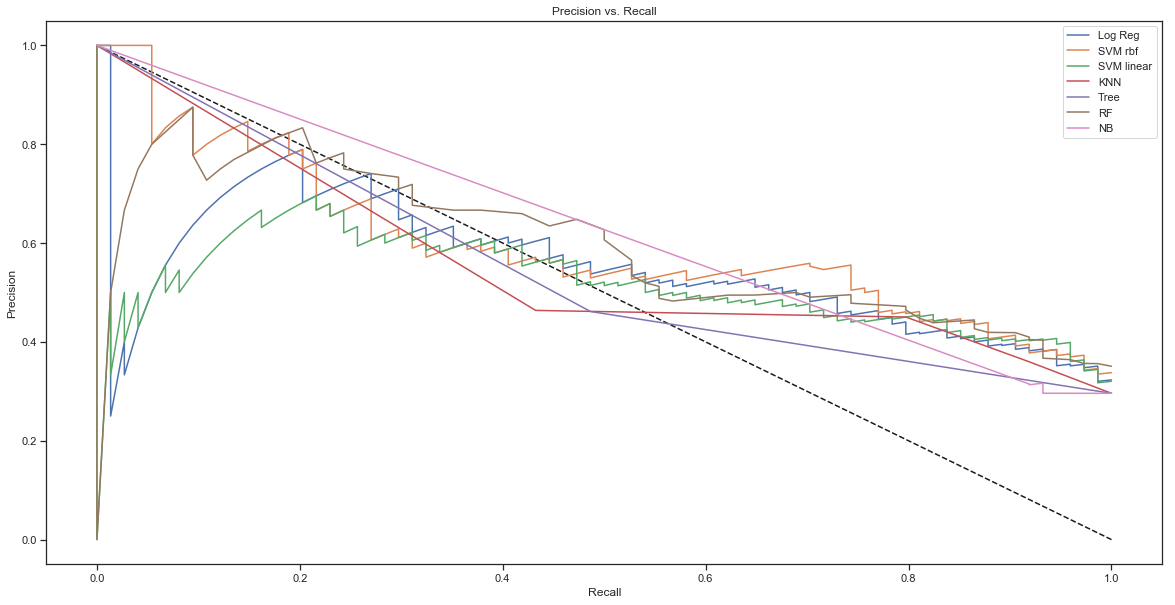

In [67]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [68]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [69]:
model = Sequential()
model.add(Dense(8, input_dim=137, activation='relu'))
model.add(Dense(12, input_dim=137, activation='relu'))
model.add(Dense(12, input_dim=137, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
epoch = 200
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 1048 samples, validate on 250 samples
Epoch 1/200
 - 1s - loss: 0.6926 - acc: 0.4957 - val_loss: 0.6883 - val_acc: 0.5720
Epoch 2/200
 - 0s - loss: 0.6911 - acc: 0.5310 - val_loss: 0.6861 - val_acc: 0.5960
Epoch 3/200
 - 0s - loss: 0.6890 - acc: 0.5396 - val_loss: 0.6809 - val_acc: 0.6440
Epoch 4/200
 - 0s - loss: 0.6857 - acc: 0.5658 - val_loss: 0.6727 - val_acc: 0.6580
Epoch 5/200
 - 0s - loss: 0.6814 - acc: 0.5654 - val_loss: 0.6630 - val_acc: 0.6840
Epoch 6/200
 - 0s - loss: 0.6741 - acc: 0.6002 - val_loss: 0.6537 - val_acc: 0.6980
Epoch 7/200
 - 0s - loss: 0.6634 - acc: 0.6293 - val_loss: 0.6425 - val_acc: 0.6980
Epoch 8/200
 - 0s - loss: 0.6479 - acc: 0.6803 - val_loss: 0.6296 - val_acc: 0.6960
Epoch 9/200
 - 0s - loss: 0.6266 - acc: 0.7176 - val_loss: 0.6194 - val_acc: 0.6760
Epoch 10/200
 - 0s - loss: 0.6021 - acc: 0.7323 - val_loss: 0.6021 - val_acc: 0.6840
Epoch 11/200
 - 0s - loss: 0.5767 - acc: 0.7519 - val_loss: 0.5964 - val_acc: 0.6800
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 0.0769 - acc: 0.9781 - val_loss: 1.1917 - val_acc: 0.6860
Epoch 98/200
 - 0s - loss: 0.0755 - acc: 0.9785 - val_loss: 1.2017 - val_acc: 0.6860
Epoch 99/200
 - 0s - loss: 0.0740 - acc: 0.9795 - val_loss: 1.2291 - val_acc: 0.6840
Epoch 100/200
 - 0s - loss: 0.0727 - acc: 0.9795 - val_loss: 1.2316 - val_acc: 0.6860
Epoch 101/200
 - 0s - loss: 0.0717 - acc: 0.9795 - val_loss: 1.2401 - val_acc: 0.6840
Epoch 102/200
 - 0s - loss: 0.0697 - acc: 0.9795 - val_loss: 1.2443 - val_acc: 0.6900
Epoch 103/200
 - 0s - loss: 0.0689 - acc: 0.9795 - val_loss: 1.2589 - val_acc: 0.6860
Epoch 104/200
 - 0s - loss: 0.0673 - acc: 0.9795 - val_loss: 1.2647 - val_acc: 0.6880
Epoch 105/200
 - 0s - loss: 0.0661 - acc: 0.9795 - val_loss: 1.2634 - val_acc: 0.6860
Epoch 106/200
 - 0s - loss: 0.0652 - acc: 0.9800 - val_loss: 1.2886 - val_acc: 0.6840
Epoch 107/200
 - 0s - loss: 0.0640 - acc: 0.9809 - val_loss: 1.3001 - val_acc: 0.6900
Epoch 108/200
 - 0s - loss: 0.0623 - acc: 0.9809 - val_lo

Epoch 193/200
 - 0s - loss: 0.0131 - acc: 0.9971 - val_loss: 2.3365 - val_acc: 0.6980
Epoch 194/200
 - 0s - loss: 0.0129 - acc: 0.9971 - val_loss: 2.3504 - val_acc: 0.7000
Epoch 195/200
 - 0s - loss: 0.0128 - acc: 0.9971 - val_loss: 2.3701 - val_acc: 0.7040
Epoch 196/200
 - 0s - loss: 0.0127 - acc: 0.9971 - val_loss: 2.3928 - val_acc: 0.6860
Epoch 197/200
 - 0s - loss: 0.0124 - acc: 0.9971 - val_loss: 2.3812 - val_acc: 0.7060
Epoch 198/200
 - 0s - loss: 0.0120 - acc: 0.9971 - val_loss: 2.4007 - val_acc: 0.7040
Epoch 199/200
 - 0s - loss: 0.0119 - acc: 0.9971 - val_loss: 2.4197 - val_acc: 0.7000
Epoch 200/200
 - 0s - loss: 0.0118 - acc: 0.9971 - val_loss: 2.4037 - val_acc: 0.7040


In [72]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

250/250 [==============================] - 0s 44us/step
Test score: 2.4052332849502562
Test accuracy: 0.7039999976158142


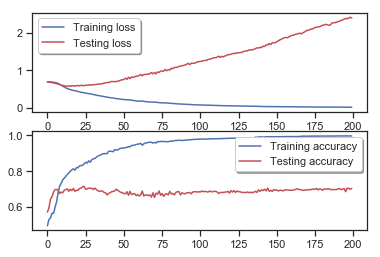

In [73]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

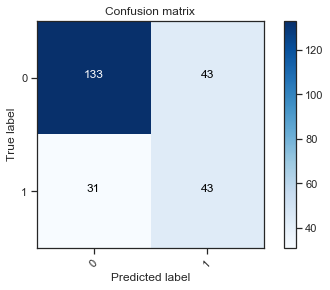

In [74]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()

In [75]:
df = pd.read_csv("Exam2019.csv")

In [76]:
df['monthlyamount'] = df['amount']/df['duration']
df = df.dropna(how='any')
df["amount"] = np.log1p(df["amount"])
df["monthlyamount"] = np.log1p(df["monthlyamount"])
df = df.dropna(how='any')
SC= StandardScaler()
credit=df['amount'].values
creditmonth=df['monthlyamount'].values
credit= credit.reshape(-1,1)
creditmonth=creditmonth.reshape(-1,1)
df["amount"]= SC.fit_transform(credit)
df["monthlyamount"] = SC.fit_transform(creditmonth)

In [77]:
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.status, drop_first=True, prefix='status'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["savings"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["checkingstatus1"], drop_first=True, prefix='checkingstatus1'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.history, drop_first=True, prefix='history'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.employ, drop_first=True, prefix='employ'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.others, drop_first=True, prefix='others'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.otherplans, drop_first=True, prefix='otherplans'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='tele'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.tele, drop_first=True, prefix='foreign'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.installment, drop_first=True, prefix='installment'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.residence, drop_first=True, prefix='residence'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.cards, drop_first=True, prefix='cards'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.liable, drop_first=True, prefix='liable'), left_index=True, right_index=True)

In [78]:
del df["checkingstatus1"]
del df["savings"]
del df["job"]
del df["duration"]
del df["status"]
del df["purpose"]
del df["housing"]
del df["history"]
del df["employ"]
del df["others"]
del df["property"]
del df["otherplans"]
del df["age"]
del df["tele"]
del df["foreign"]
del df["installment"]
del df["residence"]
del df["cards"]
del df["liable"]

In [79]:
X = df
X = df.drop('Default', axis= 1)
y = df['Default']
np.random.seed(8888)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [80]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train, y_train = ada.fit_sample(X_train, y_train)

In [81]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0, max_depth = 50), GaussianNB()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Accuracy
Random forest,0.744
Logistic Regression,0.708
Linear Svm,0.704
Radial Svm,0.692
Decision Tree,0.648
KNN,0.636
Naive Bayes,0.376


In [82]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0, max_depth=50)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


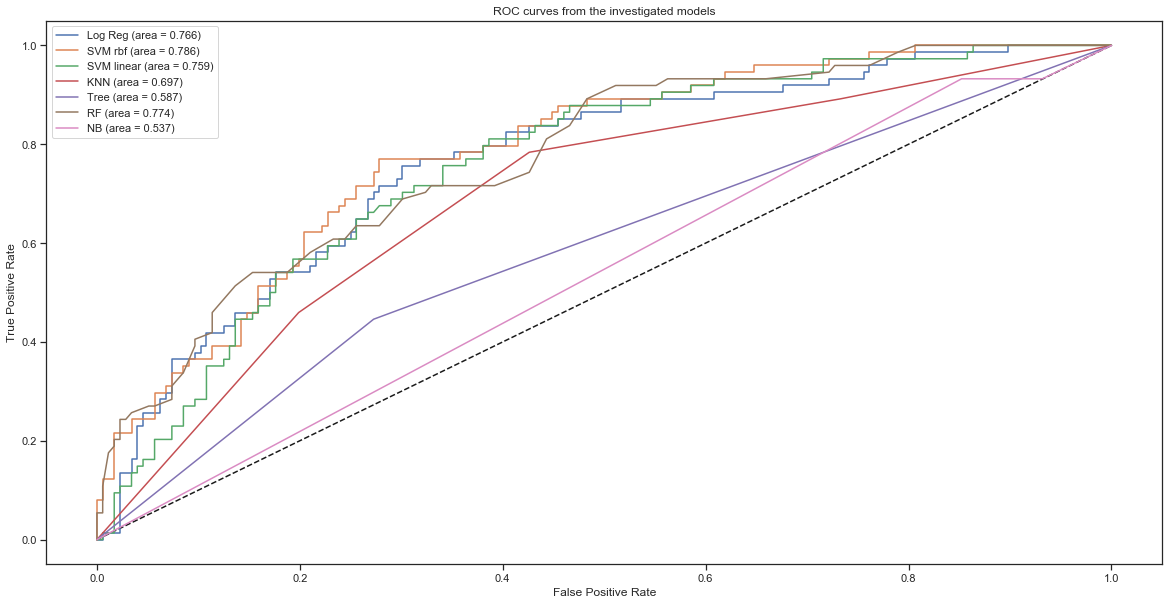

In [83]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

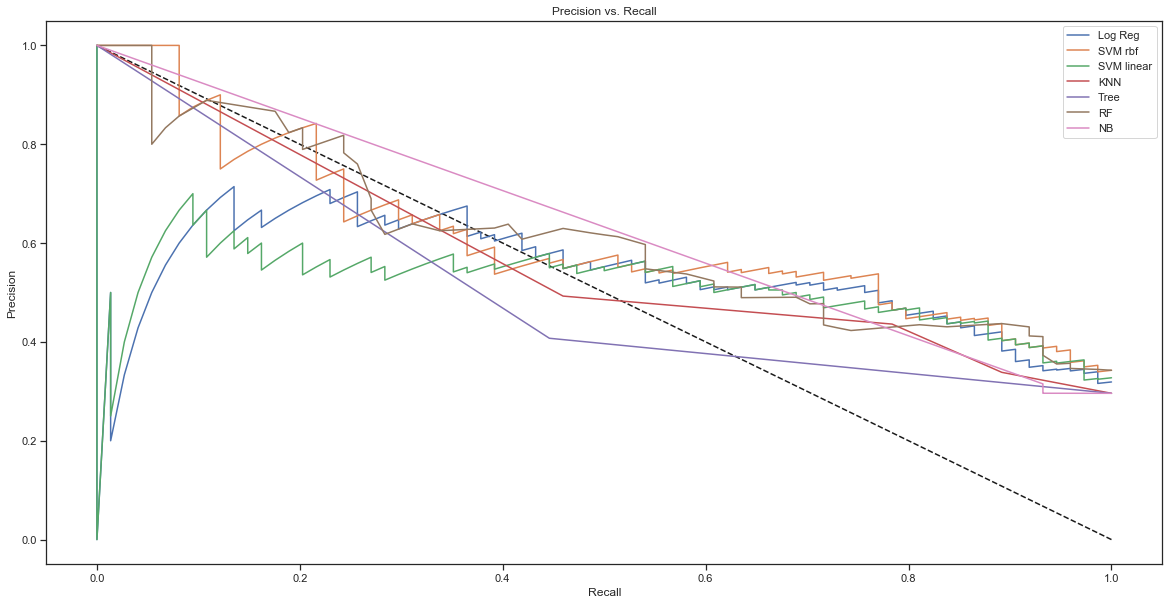

In [84]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [85]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [86]:
model = Sequential()
model.add(Dense(8, input_dim=137, activation='relu'))
model.add(Dense(12, input_dim=137, activation='relu'))
model.add(Dense(12, input_dim=137, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
epoch = 200
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 1010 samples, validate on 250 samples
Epoch 1/200
 - 1s - loss: 0.6905 - acc: 0.5144 - val_loss: 0.6807 - val_acc: 0.7000
Epoch 2/200
 - 0s - loss: 0.6880 - acc: 0.5178 - val_loss: 0.6757 - val_acc: 0.7000
Epoch 3/200
 - 0s - loss: 0.6851 - acc: 0.5178 - val_loss: 0.6696 - val_acc: 0.7040
Epoch 4/200
 - 0s - loss: 0.6815 - acc: 0.5188 - val_loss: 0.6635 - val_acc: 0.7040
Epoch 5/200
 - 0s - loss: 0.6772 - acc: 0.5297 - val_loss: 0.6552 - val_acc: 0.7020
Epoch 6/200
 - 0s - loss: 0.6716 - acc: 0.5441 - val_loss: 0.6469 - val_acc: 0.7120
Epoch 7/200
 - 0s - loss: 0.6647 - acc: 0.5569 - val_loss: 0.6366 - val_acc: 0.7100
Epoch 8/200
 - 0s - loss: 0.6561 - acc: 0.5614 - val_loss: 0.6241 - val_acc: 0.7080
Epoch 9/200
 - 0s - loss: 0.6450 - acc: 0.5990 - val_loss: 0.6120 - val_acc: 0.7200
Epoch 10/200
 - 0s - loss: 0.6331 - acc: 0.6386 - val_loss: 0.5958 - val_acc: 0.7360
Epoch 11/200
 - 0s - loss: 0.6186 - acc: 0.6748 - val_loss: 0.5878 - val_acc: 0.7400
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 0.2543 - acc: 0.9376 - val_loss: 0.9910 - val_acc: 0.6880
Epoch 98/200
 - 0s - loss: 0.2534 - acc: 0.9376 - val_loss: 1.0076 - val_acc: 0.6940
Epoch 99/200
 - 0s - loss: 0.2526 - acc: 0.9376 - val_loss: 1.0061 - val_acc: 0.6920
Epoch 100/200
 - 0s - loss: 0.2519 - acc: 0.9376 - val_loss: 1.0148 - val_acc: 0.6900
Epoch 101/200
 - 0s - loss: 0.2511 - acc: 0.9376 - val_loss: 1.0093 - val_acc: 0.6860
Epoch 102/200
 - 0s - loss: 0.2504 - acc: 0.9376 - val_loss: 1.0336 - val_acc: 0.6900
Epoch 103/200
 - 0s - loss: 0.2498 - acc: 0.9376 - val_loss: 0.9914 - val_acc: 0.6780
Epoch 104/200
 - 0s - loss: 0.2491 - acc: 0.9376 - val_loss: 0.9998 - val_acc: 0.6740
Epoch 105/200
 - 0s - loss: 0.2483 - acc: 0.9376 - val_loss: 1.0186 - val_acc: 0.6740
Epoch 106/200
 - 0s - loss: 0.2475 - acc: 0.9376 - val_loss: 1.0373 - val_acc: 0.6800
Epoch 107/200
 - 0s - loss: 0.2469 - acc: 0.9376 - val_loss: 1.0324 - val_acc: 0.6740
Epoch 108/200
 - 0s - loss: 0.2463 - acc: 0.9376 - val_lo

Epoch 193/200
 - 0s - loss: 0.1494 - acc: 0.9782 - val_loss: 1.4935 - val_acc: 0.7080
Epoch 194/200
 - 0s - loss: 0.1485 - acc: 0.9782 - val_loss: 1.4560 - val_acc: 0.6940
Epoch 195/200
 - 0s - loss: 0.1469 - acc: 0.9782 - val_loss: 1.4543 - val_acc: 0.6880
Epoch 196/200
 - 0s - loss: 0.1461 - acc: 0.9792 - val_loss: 1.5061 - val_acc: 0.6980
Epoch 197/200
 - 0s - loss: 0.1466 - acc: 0.9782 - val_loss: 1.3146 - val_acc: 0.6940
Epoch 198/200
 - 0s - loss: 0.1455 - acc: 0.9792 - val_loss: 1.4828 - val_acc: 0.7160
Epoch 199/200
 - 0s - loss: 0.1439 - acc: 0.9792 - val_loss: 1.3247 - val_acc: 0.7120
Epoch 200/200
 - 0s - loss: 0.1436 - acc: 0.9802 - val_loss: 1.4664 - val_acc: 0.7020


In [89]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

250/250 [==============================] - 0s 37us/step
Test score: 1.4667066488265992
Test accuracy: 0.7020000023841858


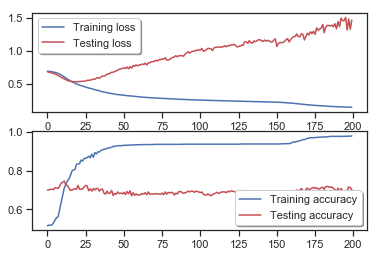

In [90]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

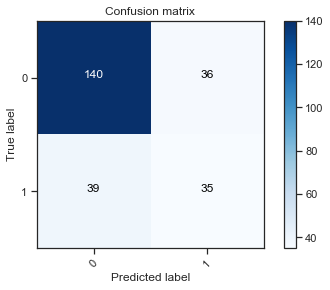

In [91]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()